In [121]:
from PIL import Image
import geopandas as gpd
import predicting_unemployement
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm

In [104]:
allFeatures, lsoa_codes = predicting_unemployement.makeAllFeatures()
allFeatures = allFeatures[allFeatures.index > "2018-12-10"]



In [105]:
def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")

mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)


In [106]:
y = allFeatures[lsoa_codes].copy()
y = y.astype("float32")
X = allFeatures.drop(columns= lsoa_codes)
np.max(y.max())

85.0

In [107]:
predictions = {}
for code in lsoa_codes:
    model = xgb.XGBRegressor()
    model.load_model(predicting_unemployement.modelPath(code))
    predictions[f"{code}"] = model.predict(X.values)


predictionDF = pd.DataFrame(predictions, index=pd.to_datetime(list(X.index)))

predictionDF = predictionDF.T
predictionDF = predictionDF.reset_index()
predictionDF = predictionDF.rename(columns={"index":"LSOA code"})


In [108]:
y = y.T
y.columns = pd.to_datetime(y.columns)
monthList = y.columns

y = y.reset_index()
y = y.rename(columns = {"index":'LSOA code'})
# merged = pd.merge(y,)

In [109]:
trueMerged = pd.merge(barnet_map, y, on = ["LSOA code"] )
trueMerged

geometry  LSOA code  \
0    POLYGON ((-0.13844 51.63652, -0.13534 51.63512...  E01000115   
1    POLYGON ((-0.14836 51.63712, -0.14759 51.63628...  E01000116   
2    POLYGON ((-0.15362 51.63381, -0.15445 51.63321...  E01000117   
3    POLYGON ((-0.15155 51.63453, -0.14967 51.63363...  E01000118   
4    POLYGON ((-0.13399 51.63405, -0.13395 51.63361...  E01000119   
..                                                 ...        ...   
204  POLYGON ((-0.17462 51.62222, -0.17482 51.62145...  E01000320   
205  POLYGON ((-0.17381 51.62378, -0.17374 51.62305...  E01000321   
206  POLYGON ((-0.17609 51.61923, -0.17609 51.61873...  E01000322   
207  POLYGON ((-0.17189 51.61706, -0.17212 51.61653...  E01000323   
208  POLYGON ((-0.16442 51.61710, -0.16345 51.61643...  E01000324   

     2019-01-01 00:00:00  2019-02-01 00:00:00  2019-03-01 00:00:00  \
0                    5.0                  5.0                  5.0   
1                   10.0                 10.0                 10.0   
2                   15.0                 15.0                 15.0   
3                   20.0                 25.0                 25.0   
4                    5.0                 10.0                 10.0   
..                   ...                  ...                  ...   
204                 10.0                 15.0                 15.0   
205                 25.0                 30.0                 30.0   
206                 20.0                 25.0                 20.0   
207                 60.0                 65.0                 60.0   
208                 15.0                 15.0                 15.0   

     2019-04-01 00:00:00  2019-05-01 00:00:00  2019-06-01 00:00:00  \
0                    5.0                 10.0                 10.0   
1                   10.0                 10.0                  5.0   
2                   20.0                 20.0                 20.0   
3                   25.0                 20.0                 20.0   
4                   10.0                 15.0                 15.0   
..                   ...                  ...                  ...   
204                 15.0                 15.0                 15.0   
205                 30.0                 30.0                 30.0   
206                 25.0                 25.0                 30.0   
207                 65.0                 70.0                 65.0   
208                 15.0                 15.0                 20.0   

     2019-07-01 00:00:00  2019-08-01 00:00:00  2019-09-01 00:00:00  \
0                   10.0                 10.0                 10.0   
1                   10.0                 10.0                  5.0   
2                   15.0                 15.0                 15.0   
3                   20.0                 20.0                 15.0   
4                   10.0                 10.0                 10.0   
..                   ...                  ...                  ...   
204                 20.0                 15.0                 15.0   
205                 35.0                 35.0                 45.0   
206                 35.0                 35.0                 25.0   
207                 70.0                 70.0                 65.0   
208                 25.0                 20.0                 25.0   

     2019-10-01 00:00:00  2019-11-01 00:00:00  2019-12-01 00:00:00  
0                   10.0                 10.0                 10.0  
1                    5.0                  5.0                 10.0  
2                   15.0                 15.0                 15.0  
3                   20.0                 20.0                 20.0  
4                   15.0                 15.0                 15.0  
..                   ...                  ...                  ...  
204                 15.0                 20.0                 25.0  
205                 45.0                 50.0                 45.0  
206                 20.0                 20.0                 20.0  
207 

In [110]:
predMerged = pd.merge(barnet_map, predictionDF, on = ["LSOA code"])
predMerged

geometry  LSOA code  \
0    POLYGON ((-0.13844 51.63652, -0.13534 51.63512...  E01000115   
1    POLYGON ((-0.14836 51.63712, -0.14759 51.63628...  E01000116   
2    POLYGON ((-0.15362 51.63381, -0.15445 51.63321...  E01000117   
3    POLYGON ((-0.15155 51.63453, -0.14967 51.63363...  E01000118   
4    POLYGON ((-0.13399 51.63405, -0.13395 51.63361...  E01000119   
..                                                 ...        ...   
204  POLYGON ((-0.17462 51.62222, -0.17482 51.62145...  E01000320   
205  POLYGON ((-0.17381 51.62378, -0.17374 51.62305...  E01000321   
206  POLYGON ((-0.17609 51.61923, -0.17609 51.61873...  E01000322   
207  POLYGON ((-0.17189 51.61706, -0.17212 51.61653...  E01000323   
208  POLYGON ((-0.16442 51.61710, -0.16345 51.61643...  E01000324   

     2019-01-01 00:00:00  2019-02-01 00:00:00  2019-03-01 00:00:00  \
0               5.000525             5.000190             5.000165   
1              10.000061             9.999952             9.675158   
2              15.000596            14.999586            15.000405   
3              20.331337            24.999289            20.035143   
4               5.000501             9.999862             9.999354   
..                   ...                  ...                  ...   
204             9.999888            14.999954            14.999918   
205            24.999996            29.999758            30.679508   
206            20.000492            24.999836            20.000181   
207            59.999954            64.999809            60.000118   
208            14.301707            13.407558            14.999791   

     2019-04-01 00:00:00  2019-05-01 00:00:00  2019-06-01 00:00:00  \
0               5.000581             9.999584            10.000435   
1               9.999946            10.000090             4.999815   
2              20.000288            19.999369            19.999838   
3              24.999773            19.999872            20.000244   
4               9.999949            10.313550            13.833314   
..                   ...                  ...                  ...   
204            15.169335            15.000438            15.088956   
205            29.999853            30.000187            31.148863   
206            24.999939            26.446608            30.000059   
207            64.999893            69.999657            69.783569   
208            14.999866            15.000633            19.999912   

     2019-07-01 00:00:00  2019-08-01 00:00:00  2019-09-01 00:00:00  \
0               9.999735            10.253292             9.999630   
1              10.000665             9.999691             5.000193   
2              15.000117            14.938772            15.000310   
3              19.999887            19.506226            15.000401   
4              10.000500            10.000012            10.000541   
..                   ...                  ...                  ...   
204            20.000019            19.765741            14.966385   
205            35.000267            37.116104            45.000305   
206            32.836853            34.998714            24.999870   
207            70.000061            69.999863            64.999962   
208            24.998636            20.000286            19.914410   

     2019-10-01 00:00:00  2019-11-01 00:00:00  2019-12-01 00:00:00  
0              10.000011            10.000011            10.000011  
1               5.000135             9.759652             9.999968  
2              15.000133            15.000261            14.999763  
3              19.999828            20.000235            19.999861  
4              13.672009            15.000157            14.999753  
..                   ...                  ...                  ...  
204            15.000276            19.999792            24.998796  
205            44.999920            49.998867            44.764378  
206            20.000580            19.999727            20.000130  
207 

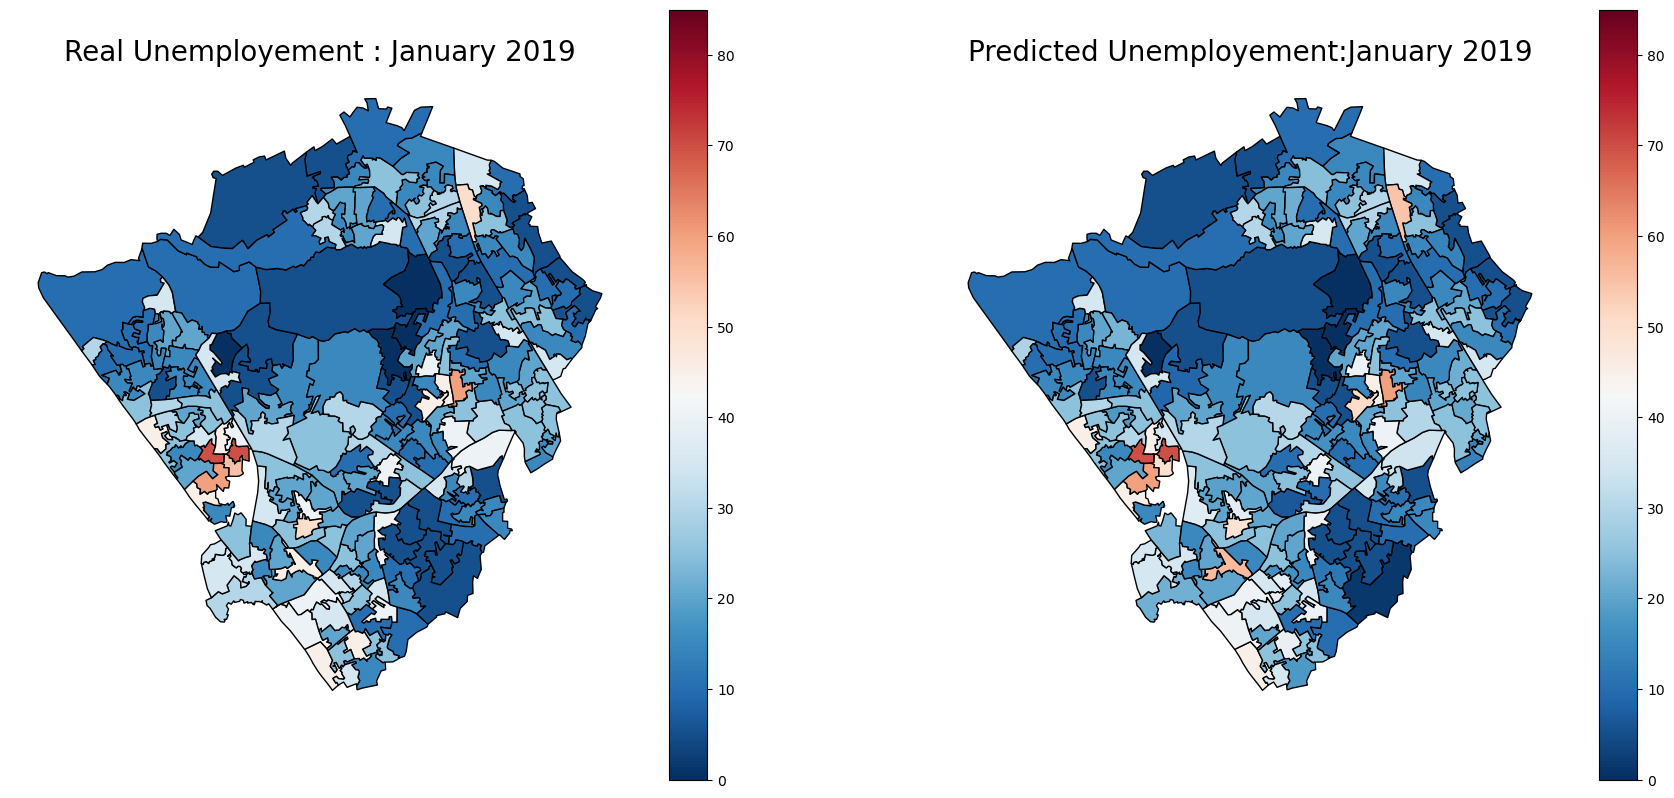

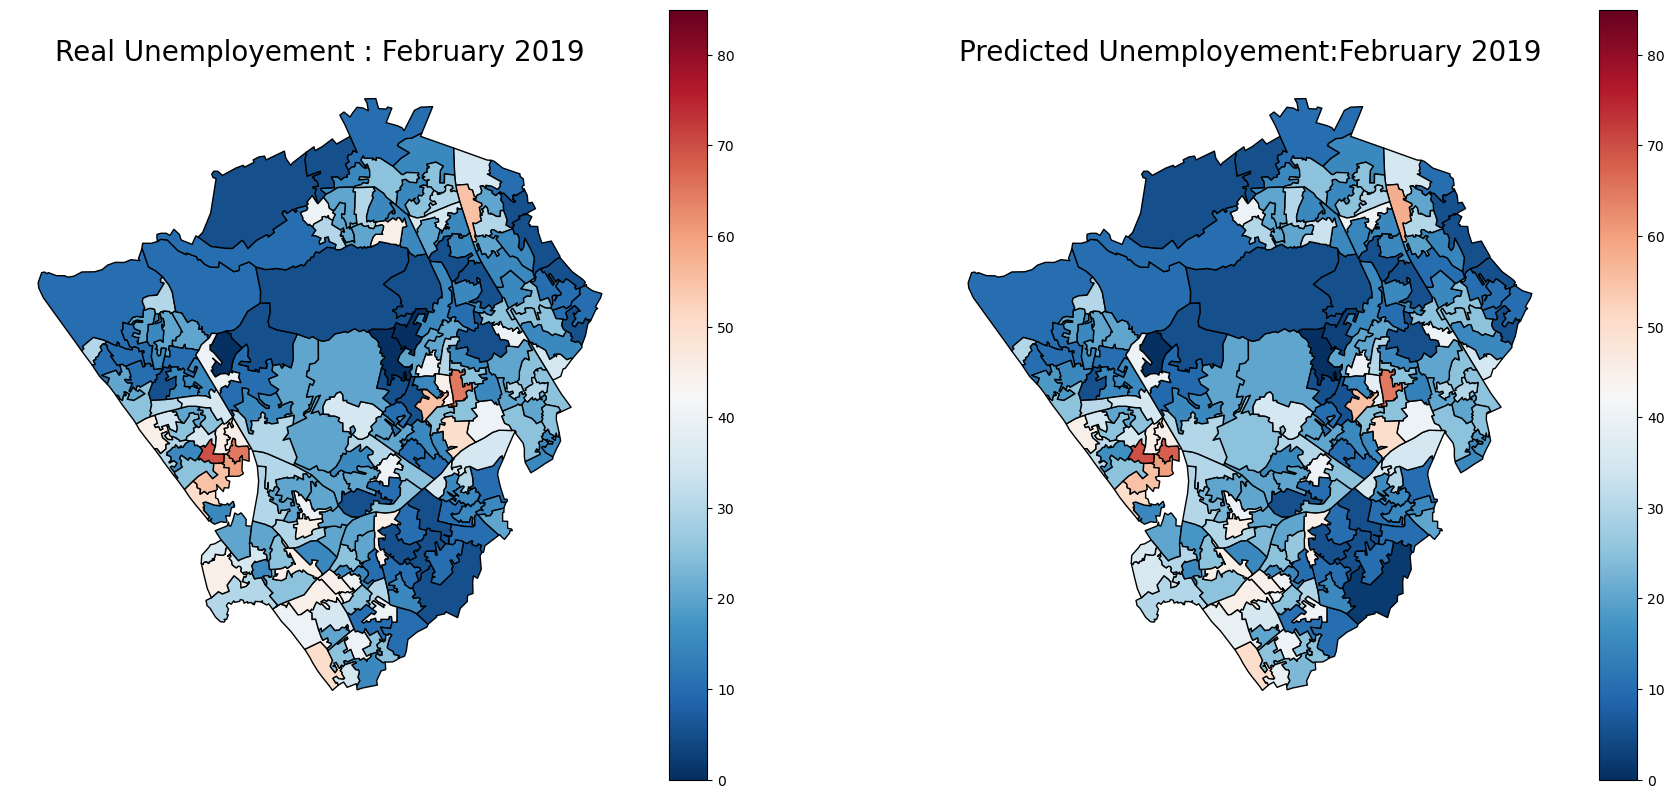

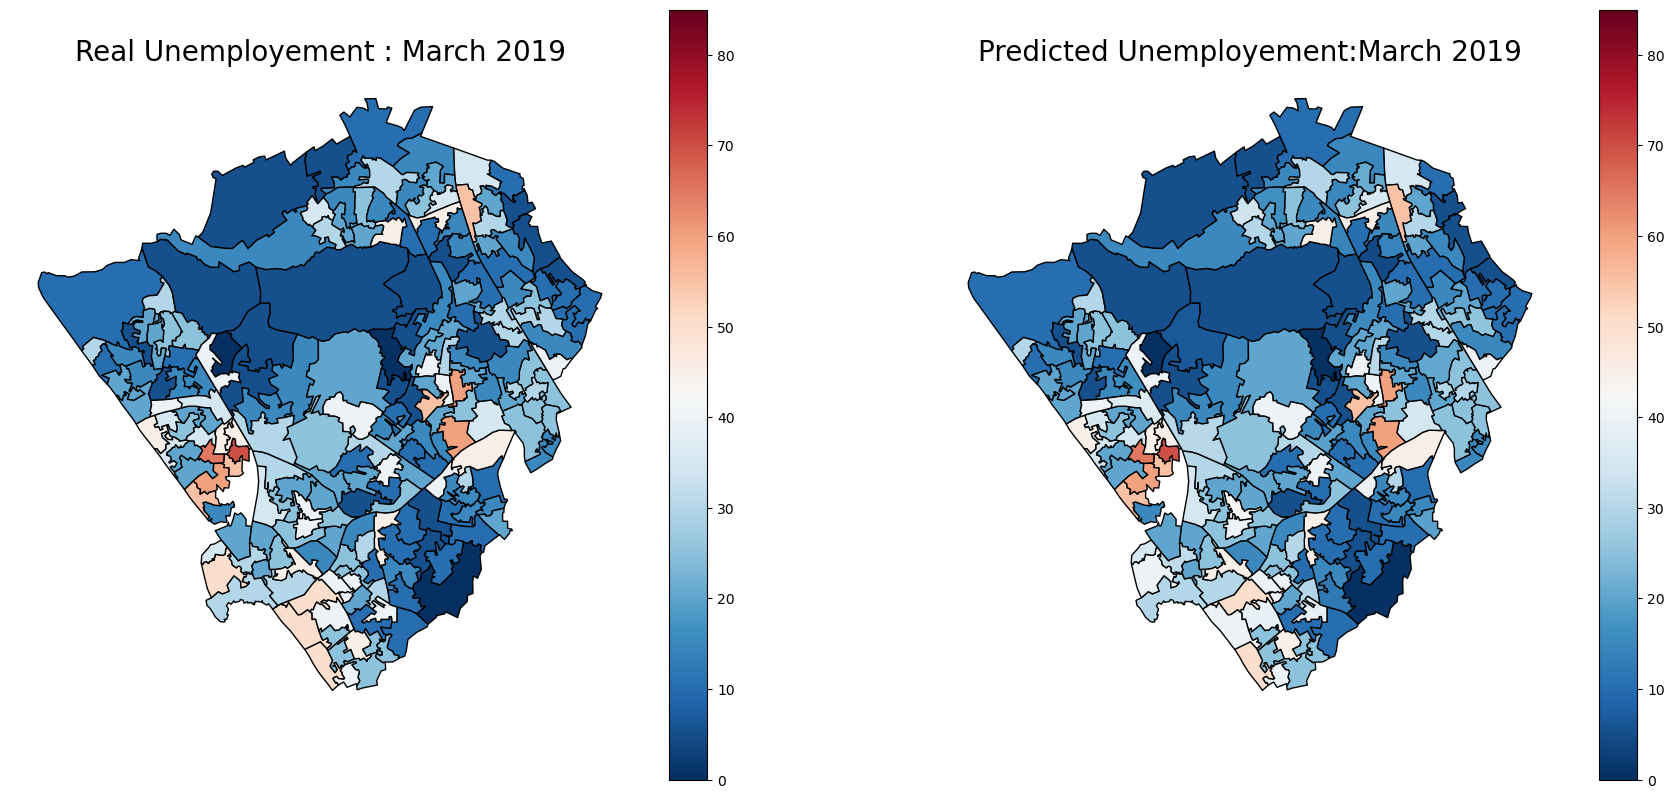

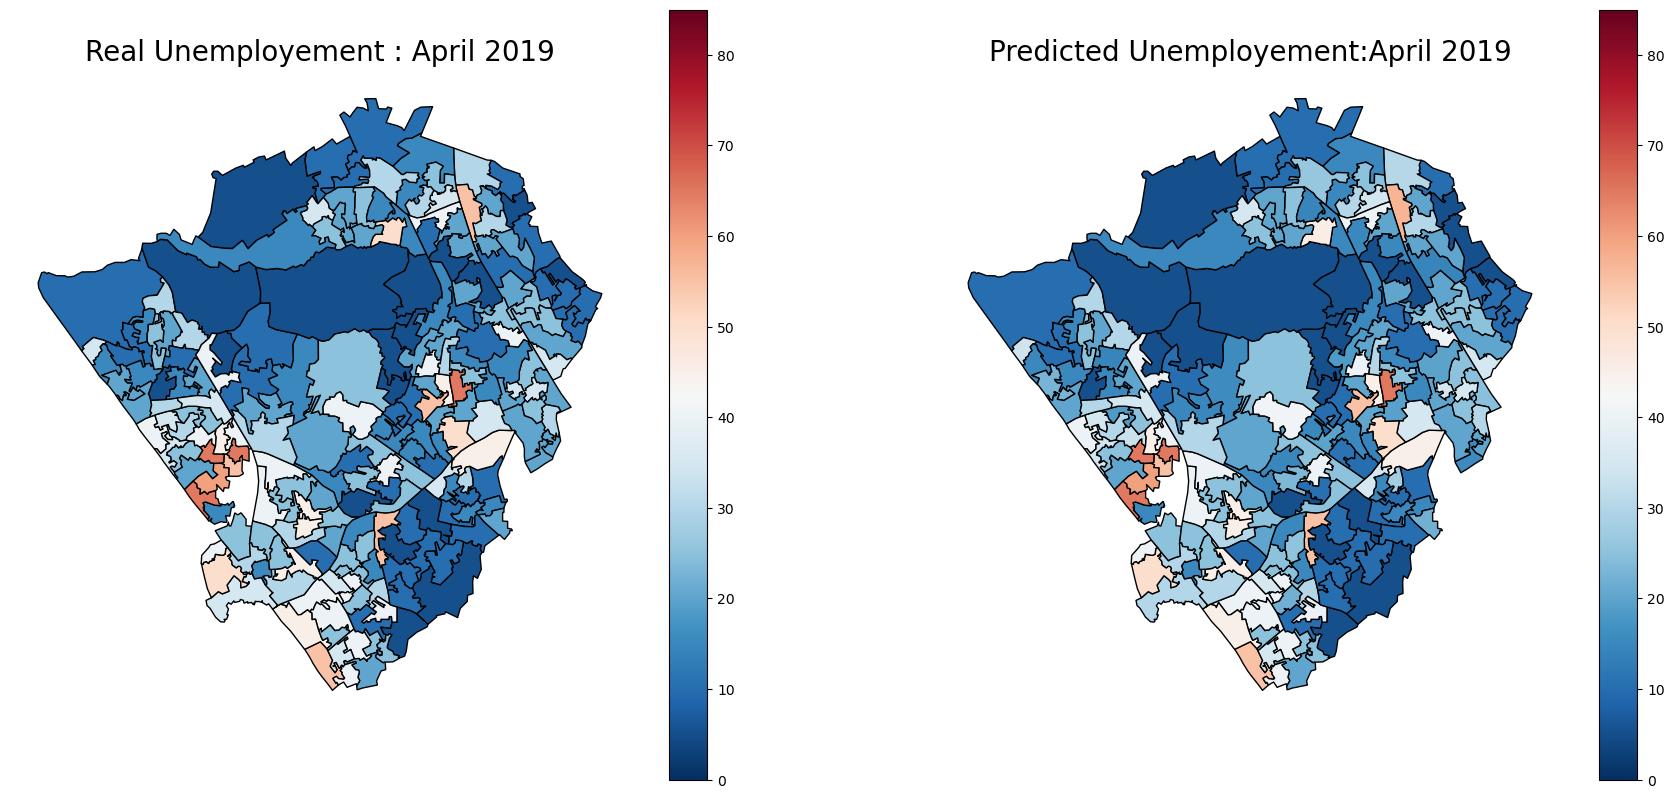

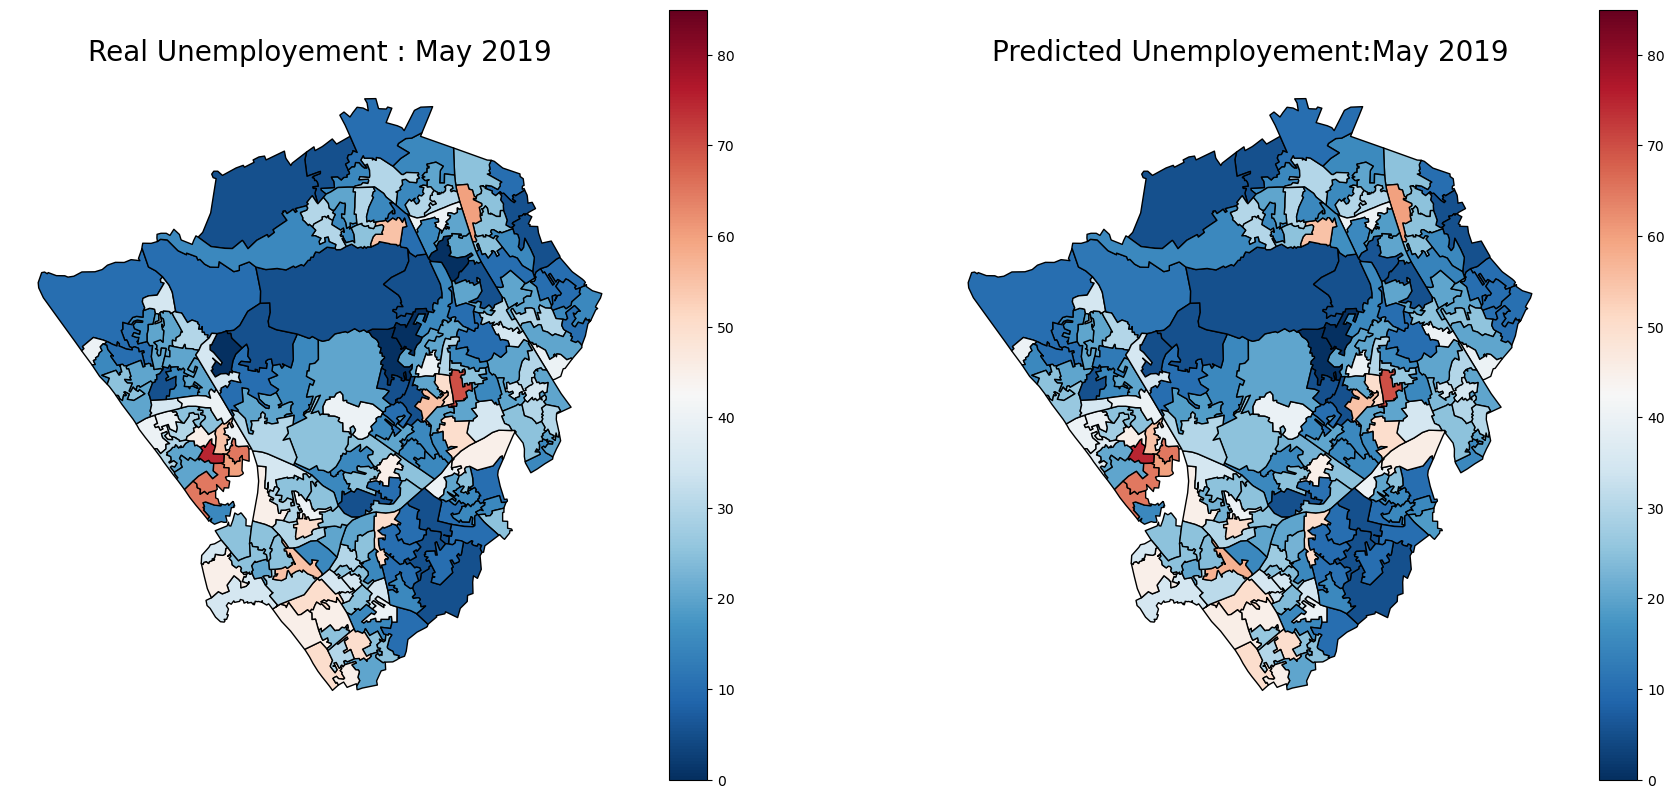

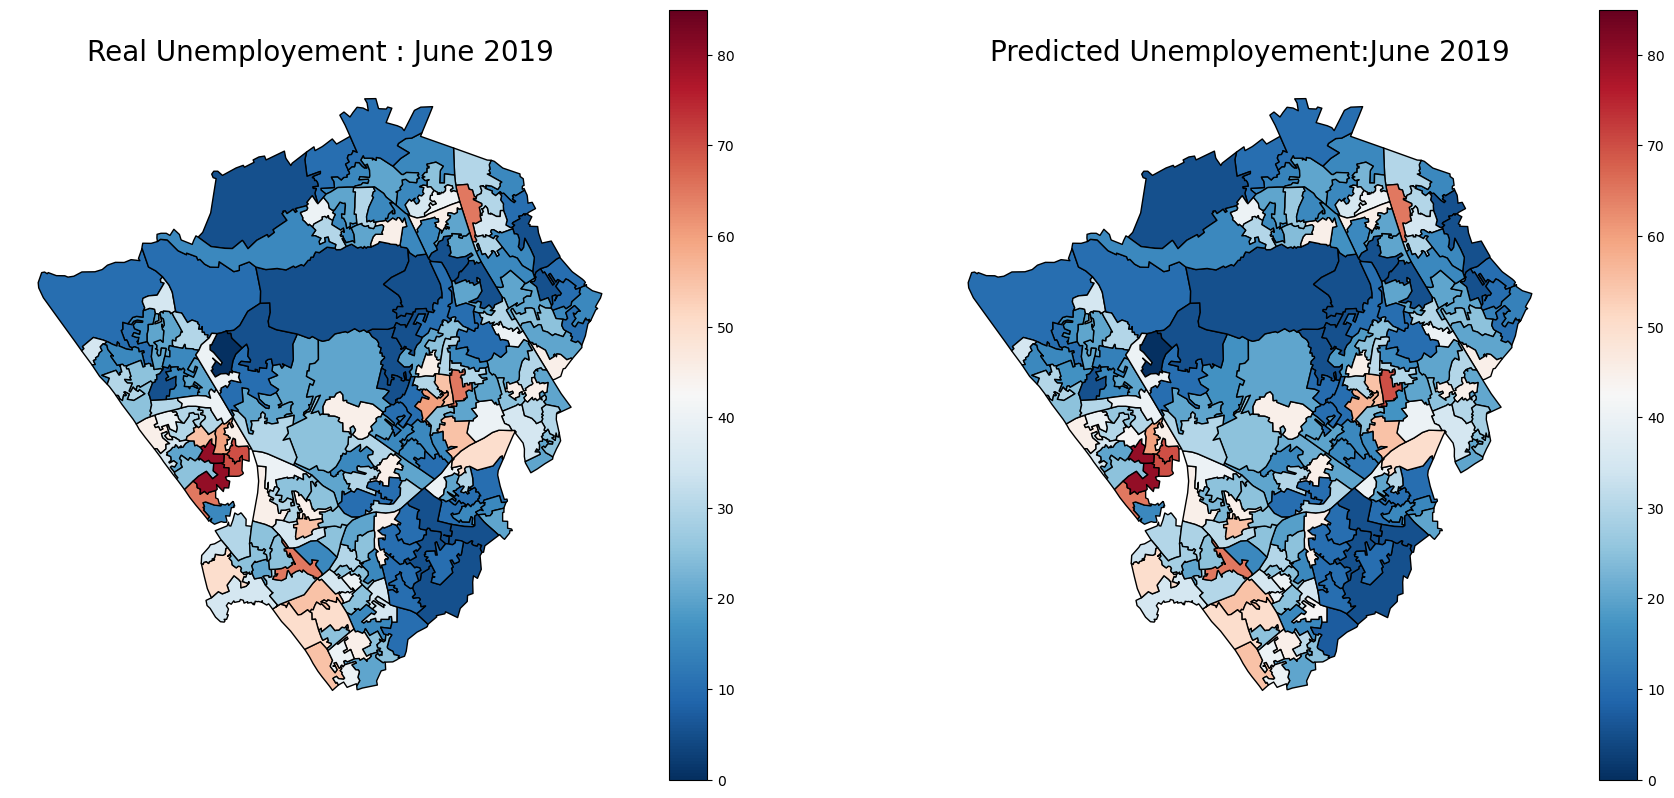

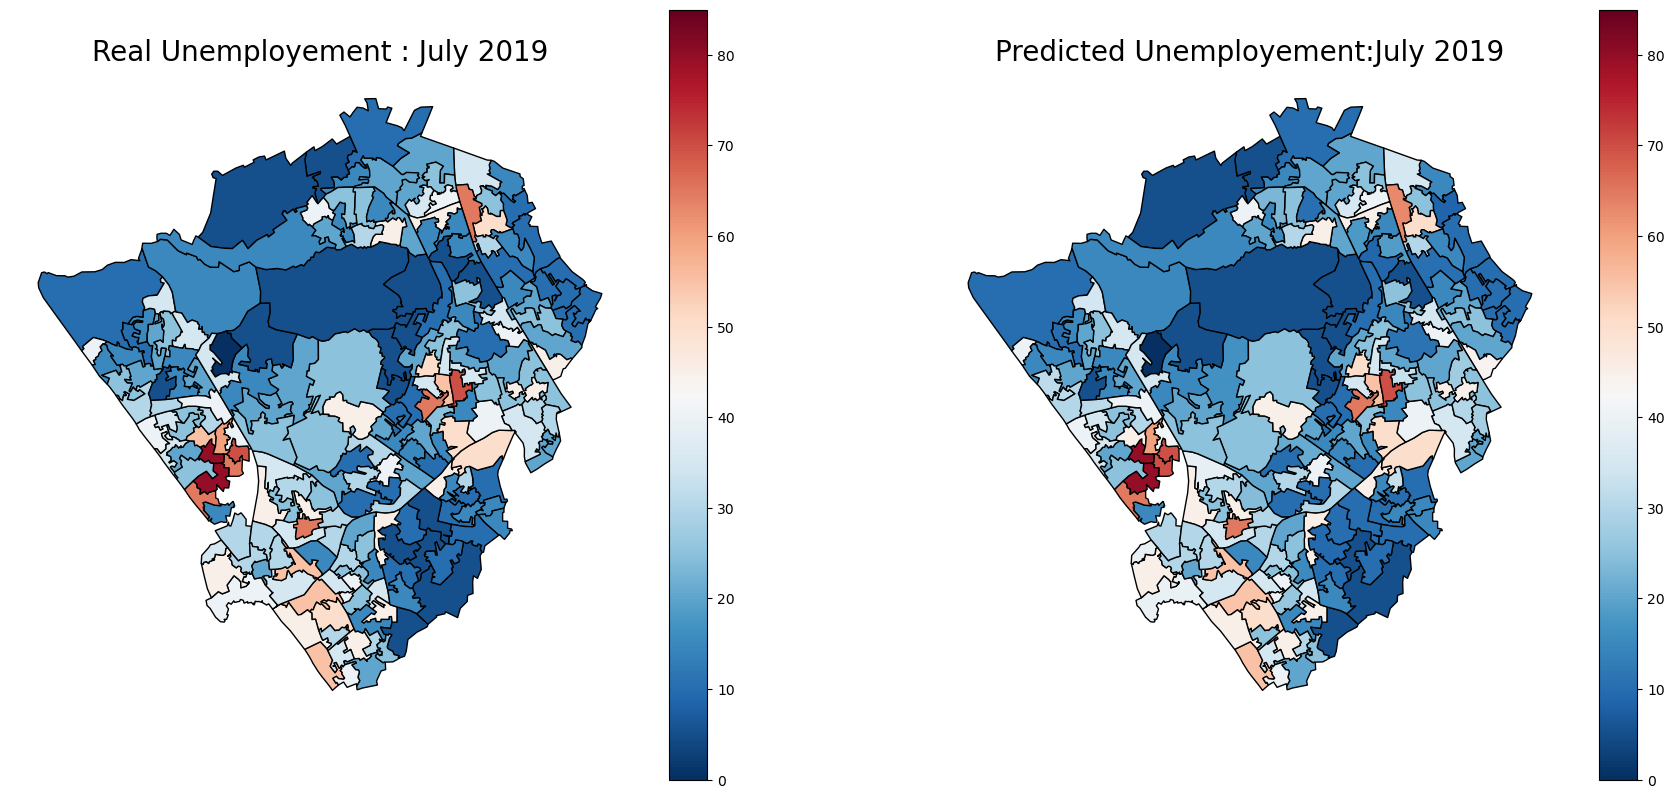

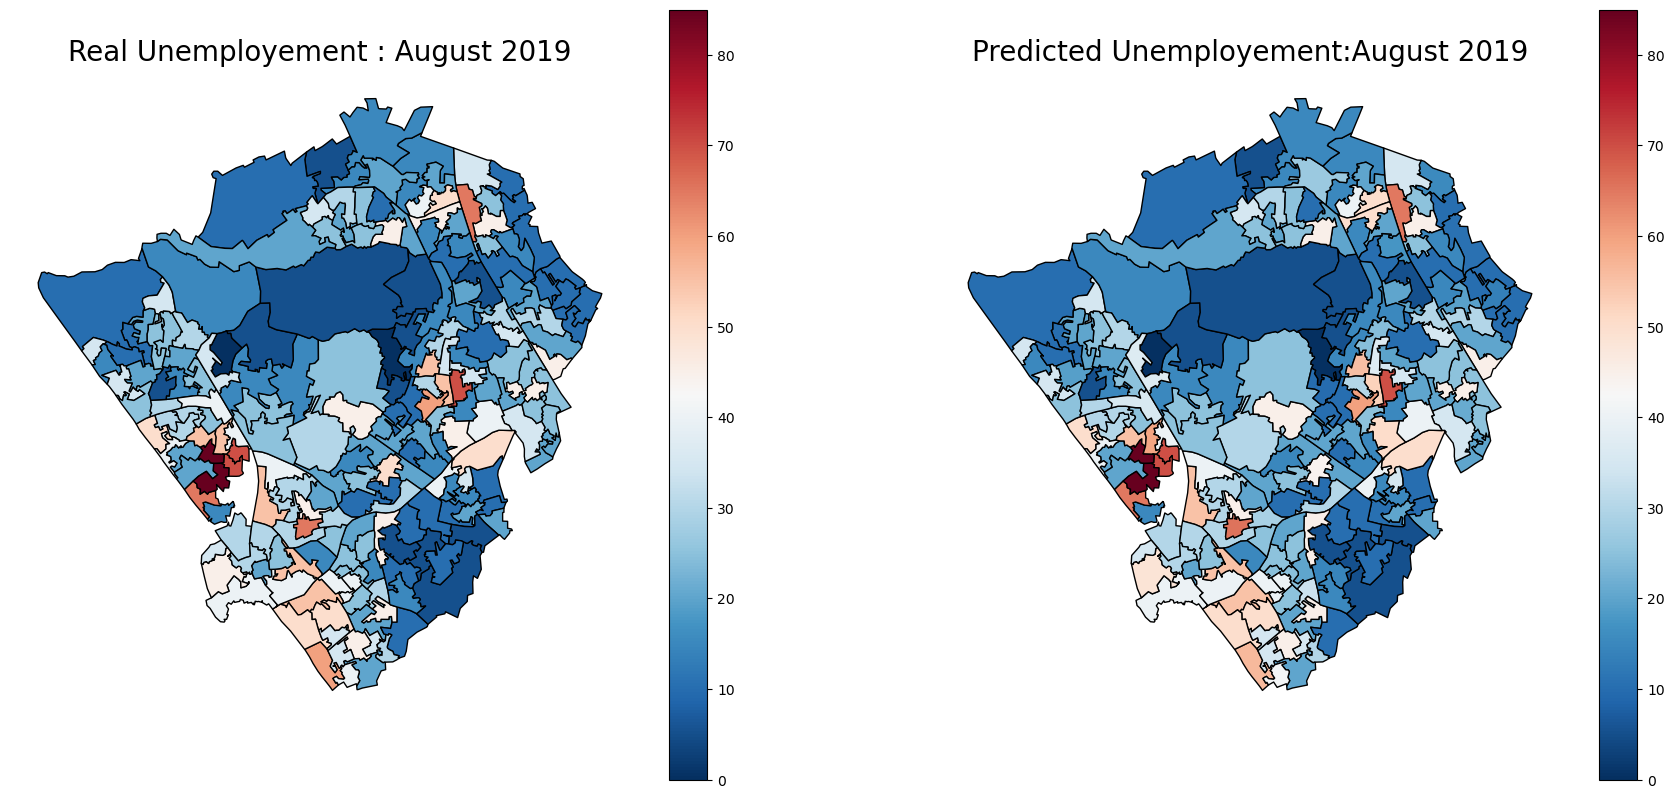

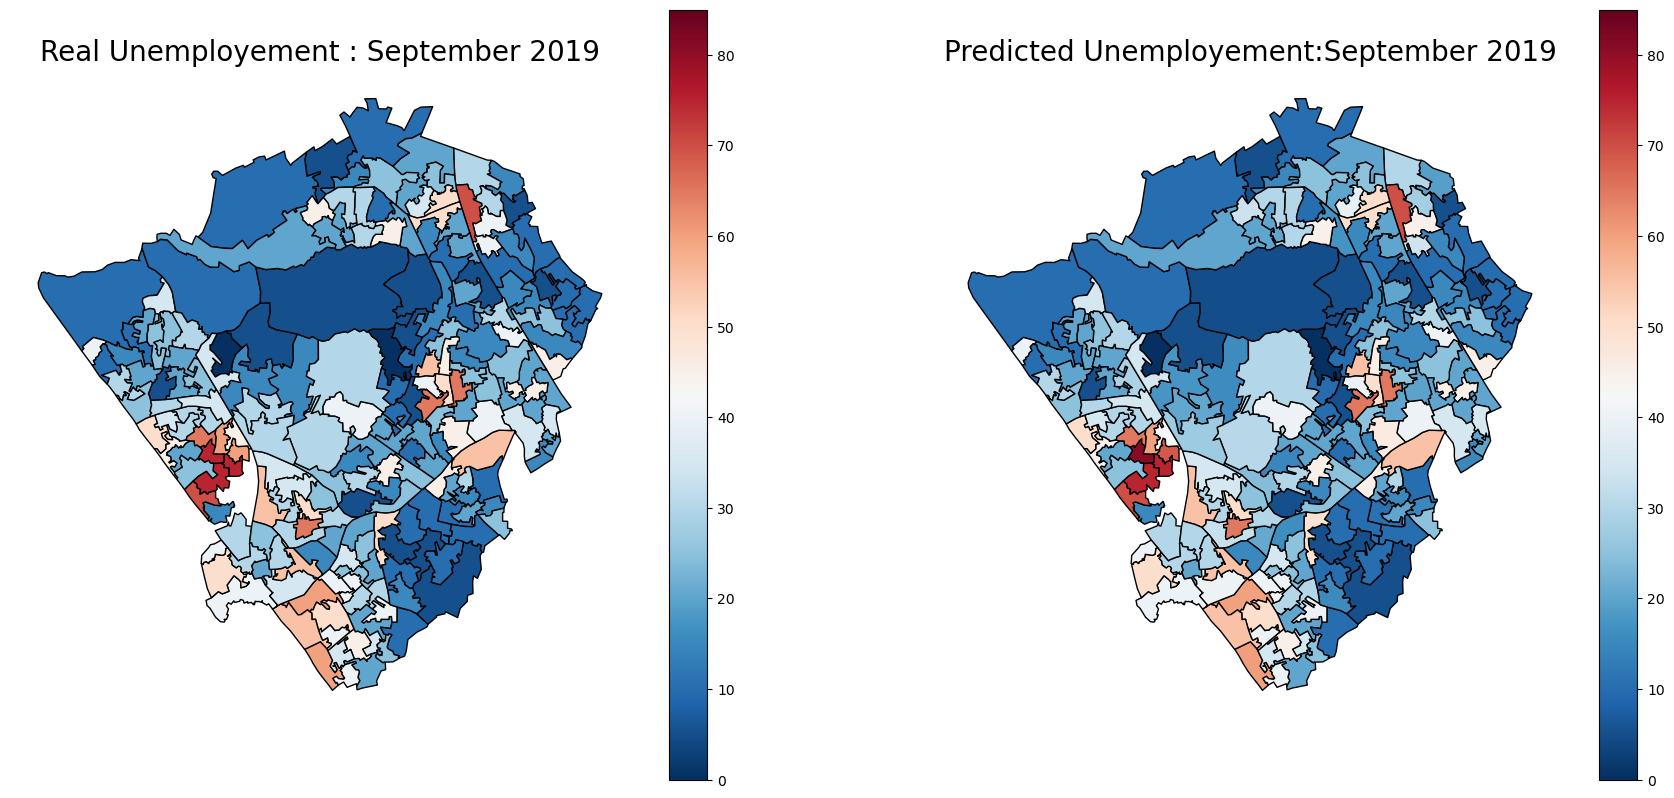

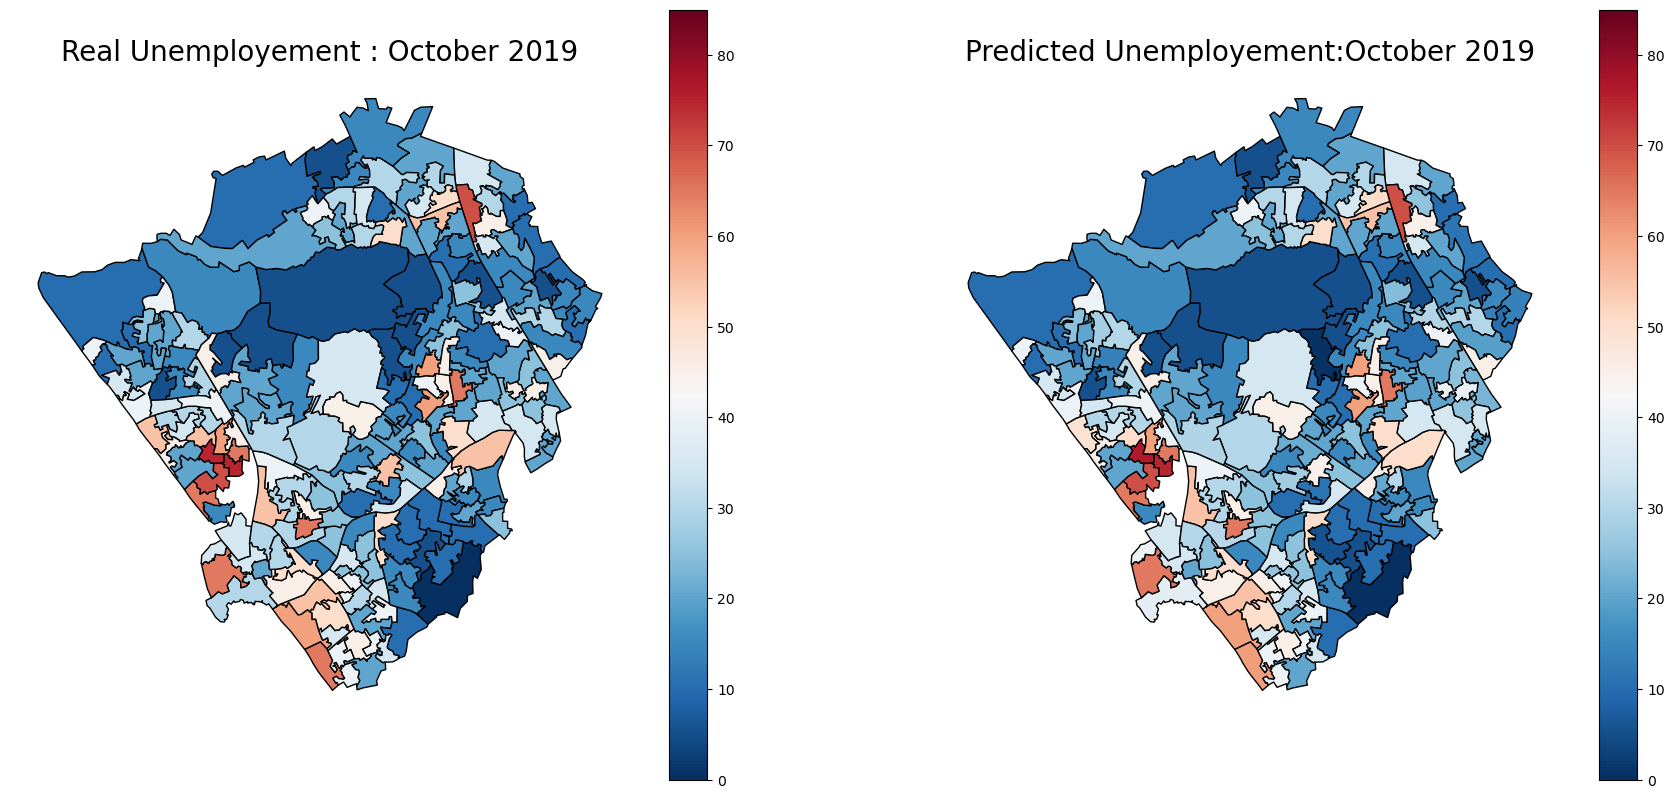

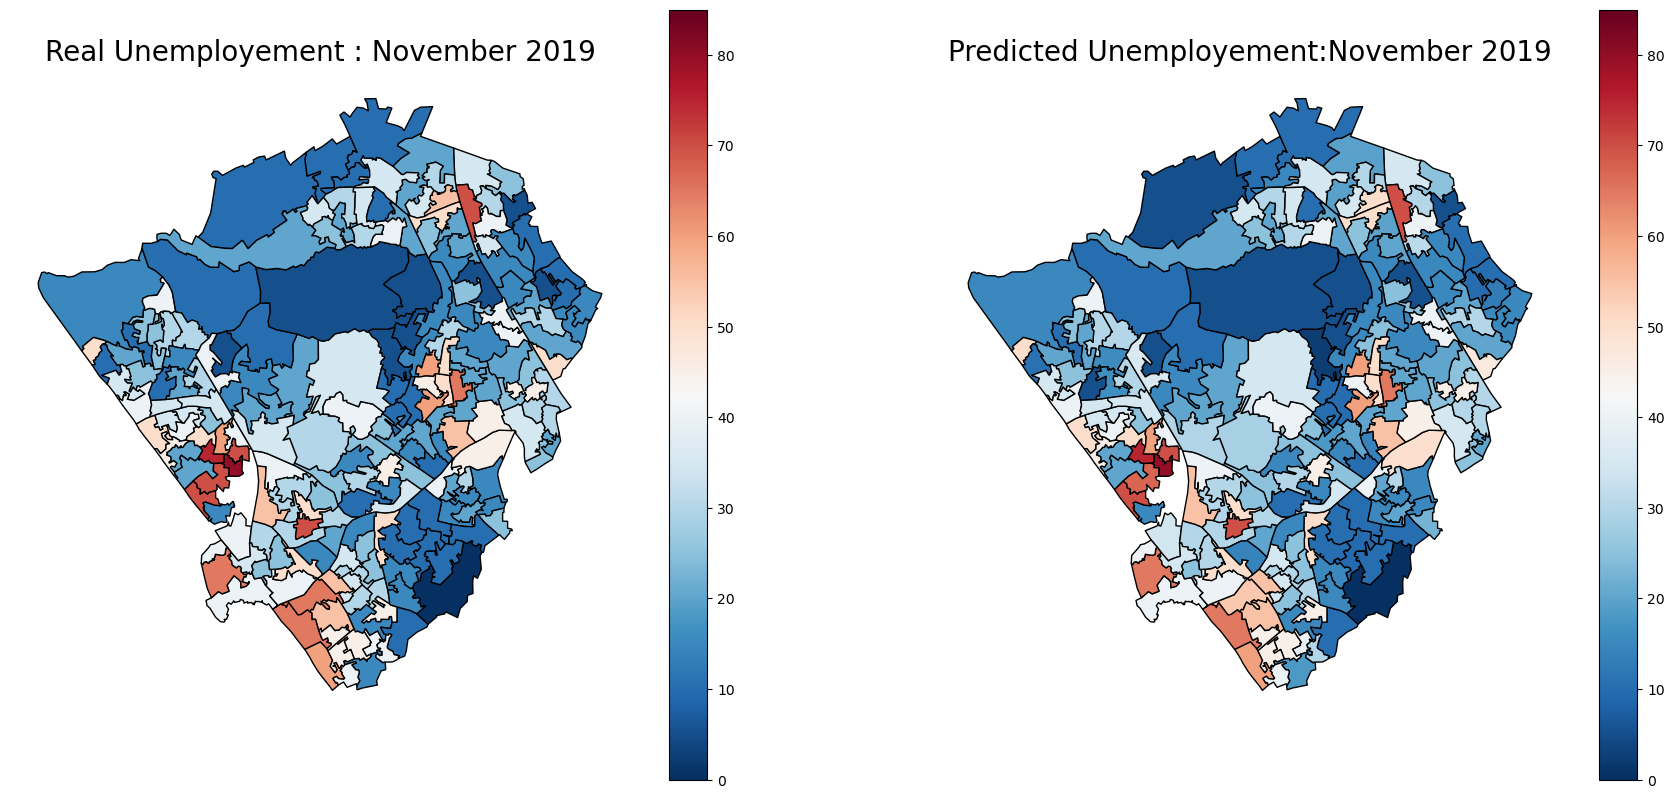

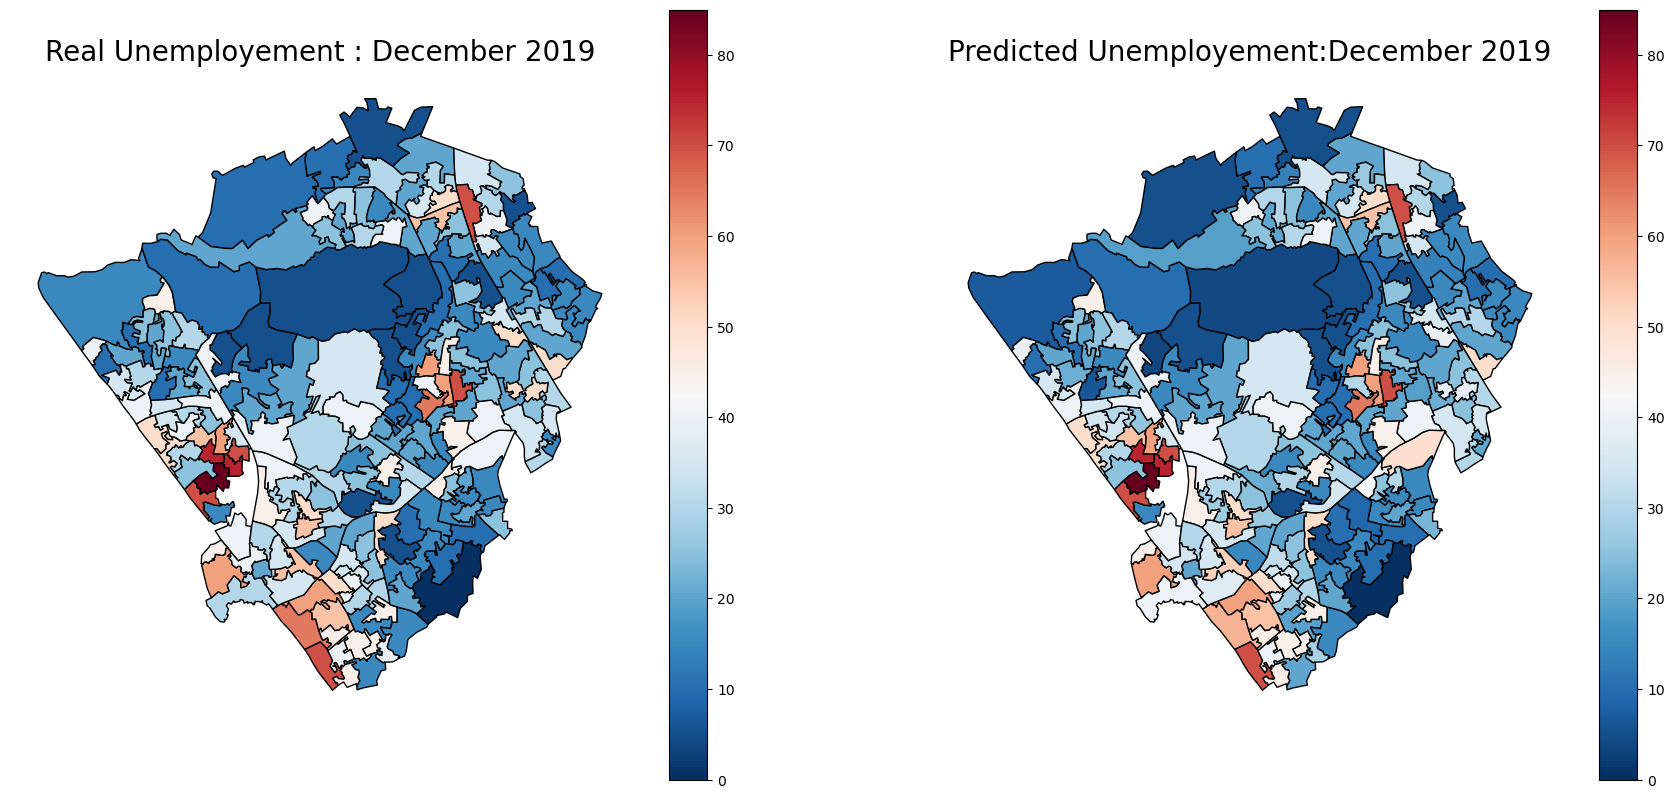

In [125]:
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
cwd = Path.cwd()
dc2 = cwd.parent
predSide = dc2.joinpath("data/img/unemployement")
frames = []
for month in monthList:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
    trueMerged.plot(column=month, cmap="RdBu_r", edgecolors="black", vmin=0, vmax=85, legend=True, norm=plt.Normalize(vmin=0, vmax=85), ax=ax1)
    predMerged.plot(column=month, cmap="RdBu_r", edgecolors="black", vmin=0, vmax=85, legend=True, norm=plt.Normalize(vmin=0, vmax=85), ax=ax2)
    ax1.set_title(f"Real Unemployement : {month_dictionary[month.month]} {month.year}", fontsize = 20)
    ax2.set_title(f"Predicted Unemployement: {month_dictionary[month.month]} {month.year}", fontsize = 20)
    ax1.axis("off")
    ax2.axis("off")
    chart = fig.get_figure()
    frames.append(predSide.joinpath(f"{month}.png"))
    chart.savefig(predSide.joinpath(f"{month}")){month.month}-{month.year}


In [127]:
fs = []
for file in frames:
    image = Image.open(file)
    fs.append(image)
fs[0].save(predSide.joinpath("unemployement_2019.gif"), format="GIF", append_images=fs[1:], save_all=True, duration=1000, loop=0)
